In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn

from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder


import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
                             roc_curve, roc_auc_score, classification_report,precision_recall_curve)

In [129]:
df = pd.read_csv(r"C:\Users\Chinna Joka\Downloads\archive\winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [130]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [131]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [133]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [134]:
null_percent = (df.isnull().mean()*100).sort_values(ascending=False)
null_check = (df.isnull().sum()).sort_values(ascending=False)

null_df = pd.DataFrame({
    'Null values' : null_check,
    'Null value percent' : null_percent
})
null_df

,Null values,Null value percent
fixed acidity,10,0.153917
pH,9,0.138525
volatile acidity,8,0.123134
sulphates,4,0.061567
citric acid,3,0.046175
chlorides,2,0.030783
residual sugar,2,0.030783
type,0,0.000000
free sulfur dioxide,0,0.000000
density,0,0.000000


<Axes: >

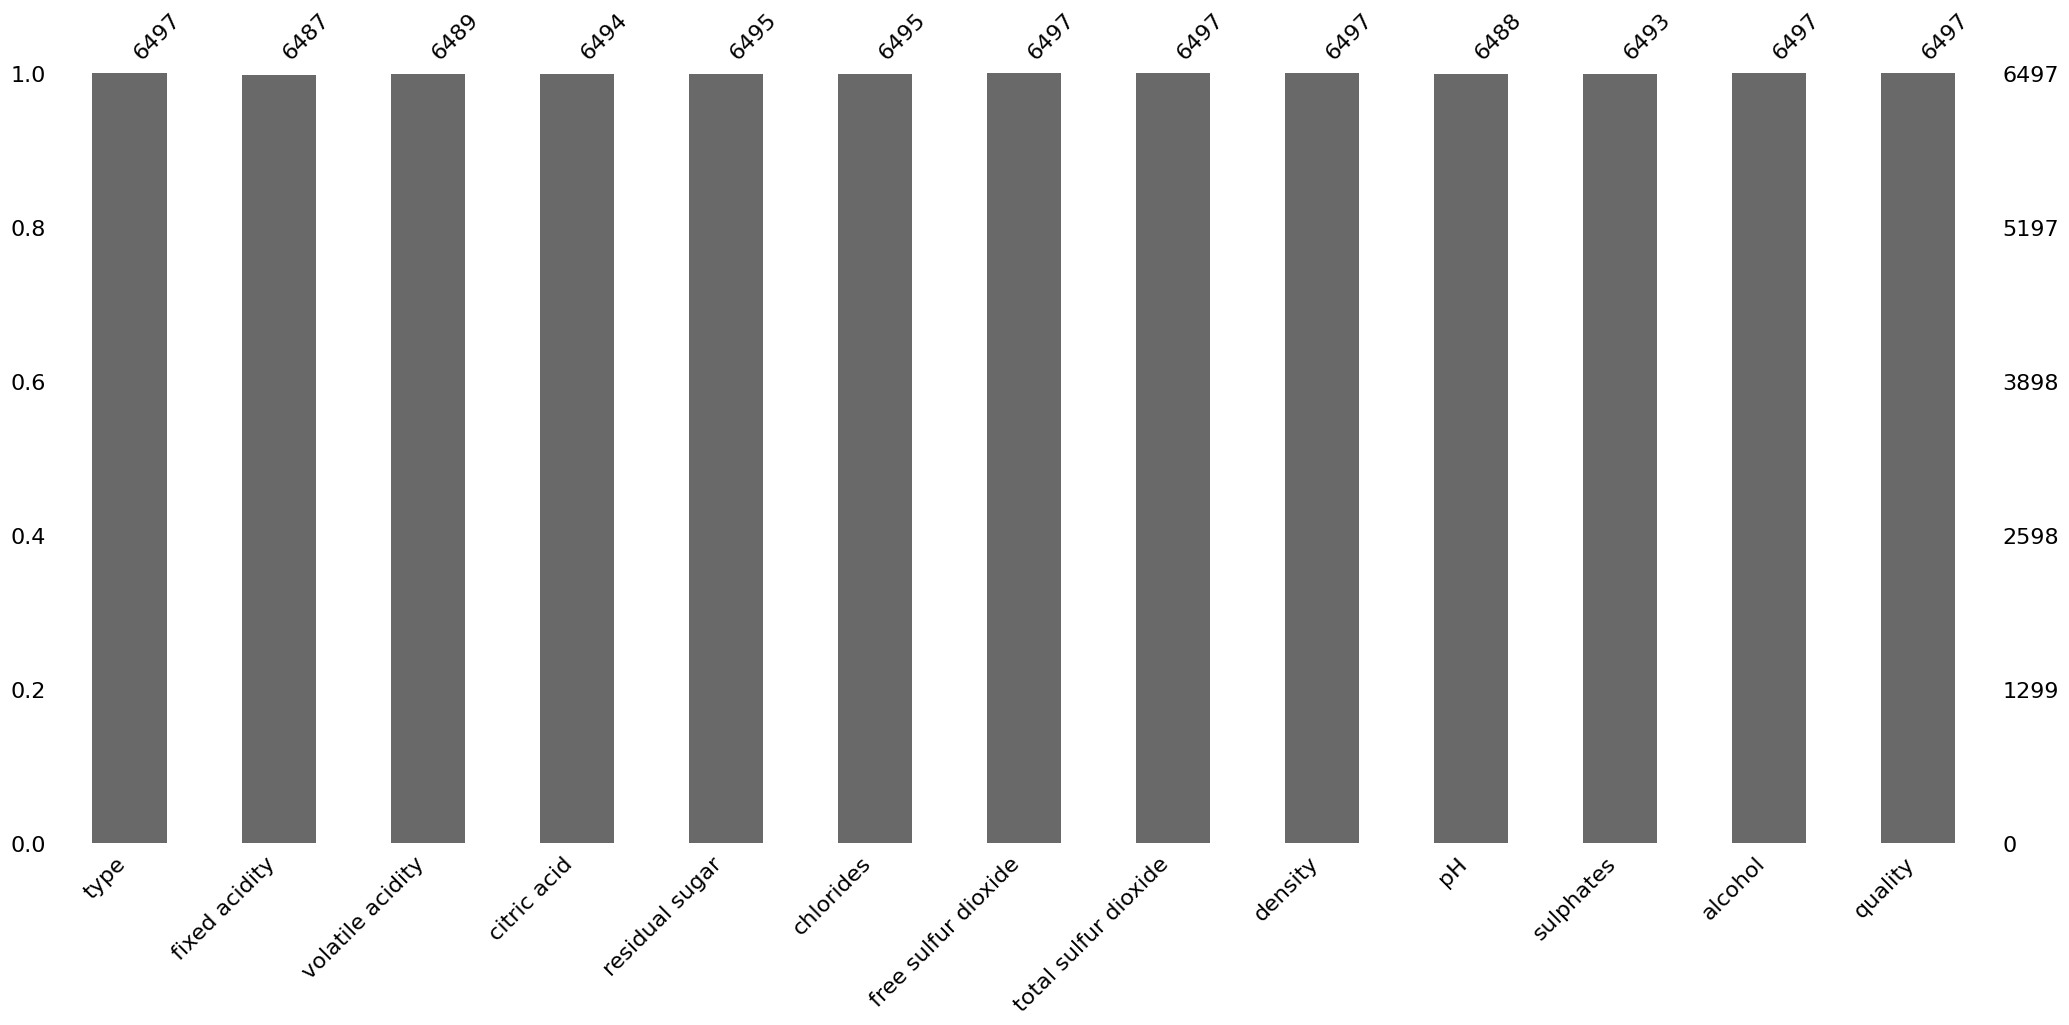

In [135]:
msn.bar(df)

In [136]:
df.dropna(inplace=True)

<Axes: >

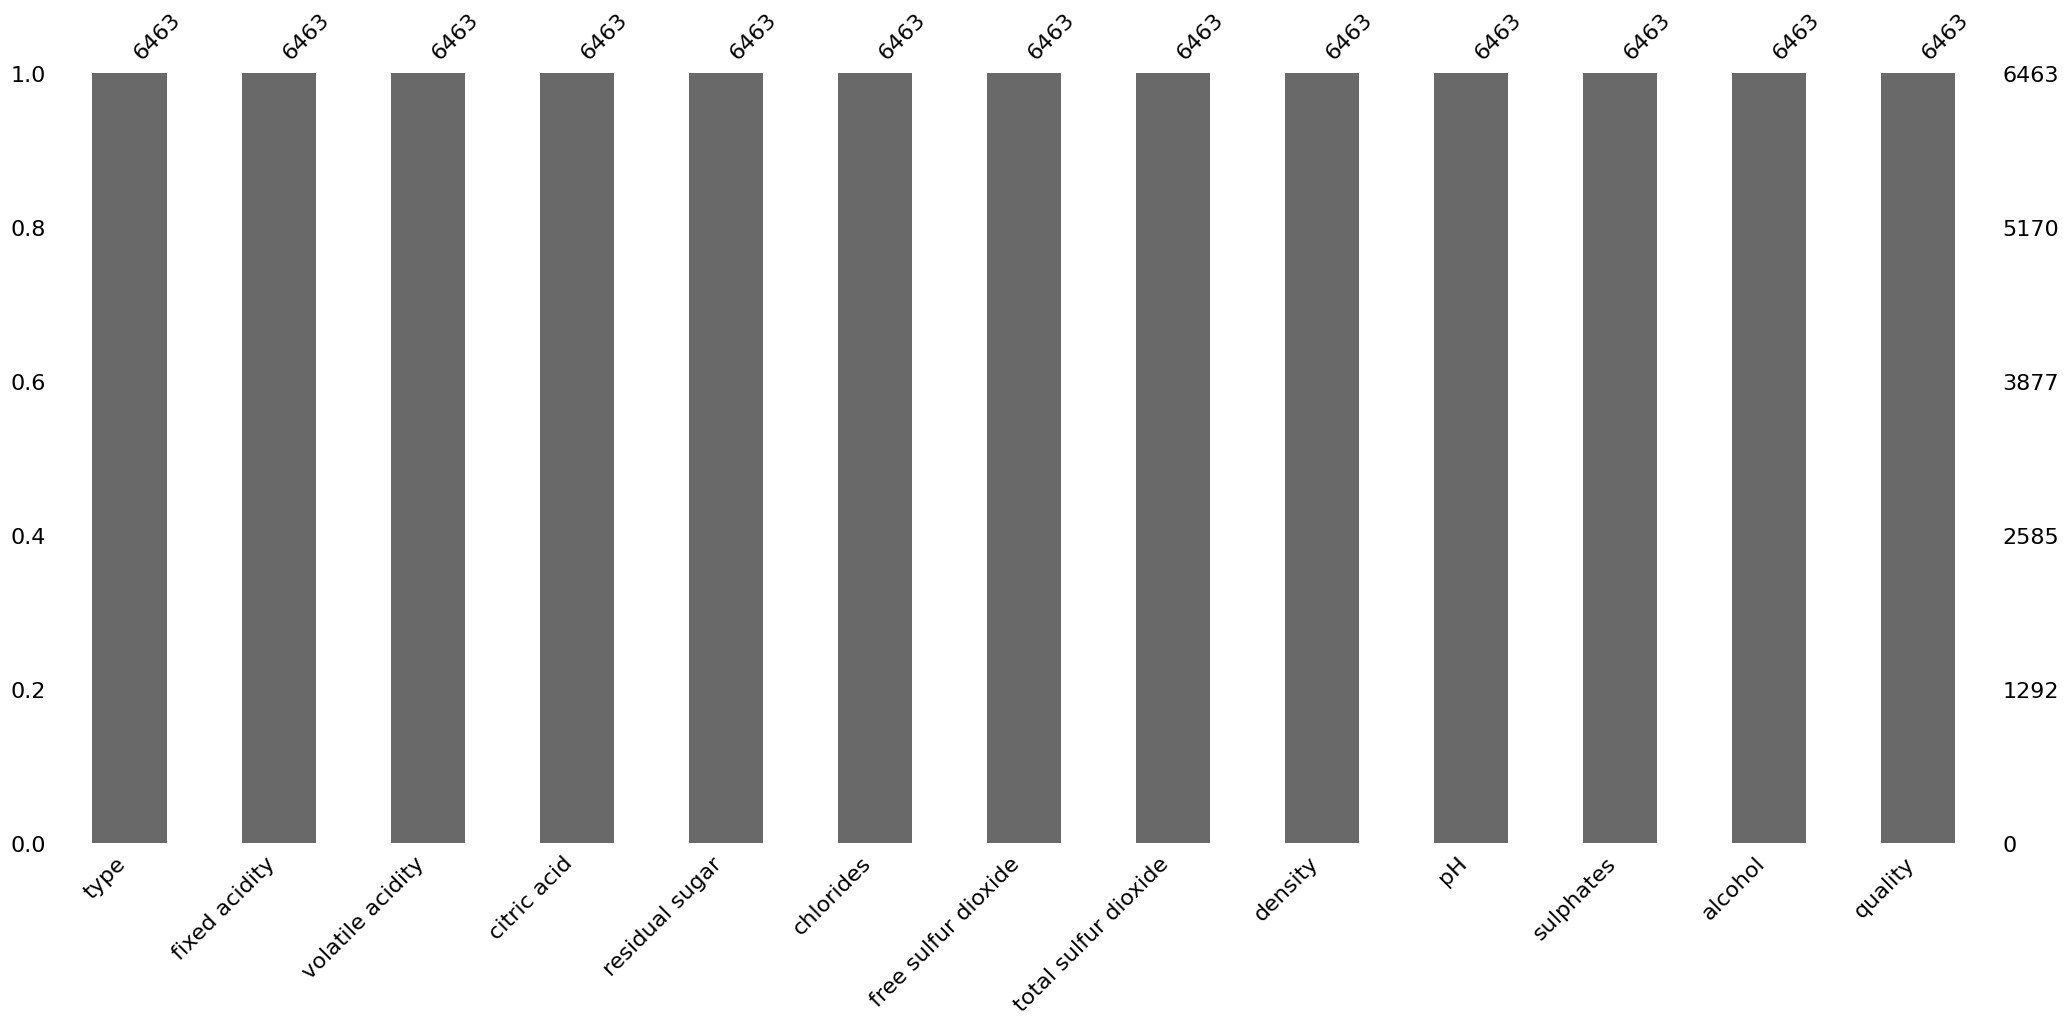

In [137]:
msn.bar(df)

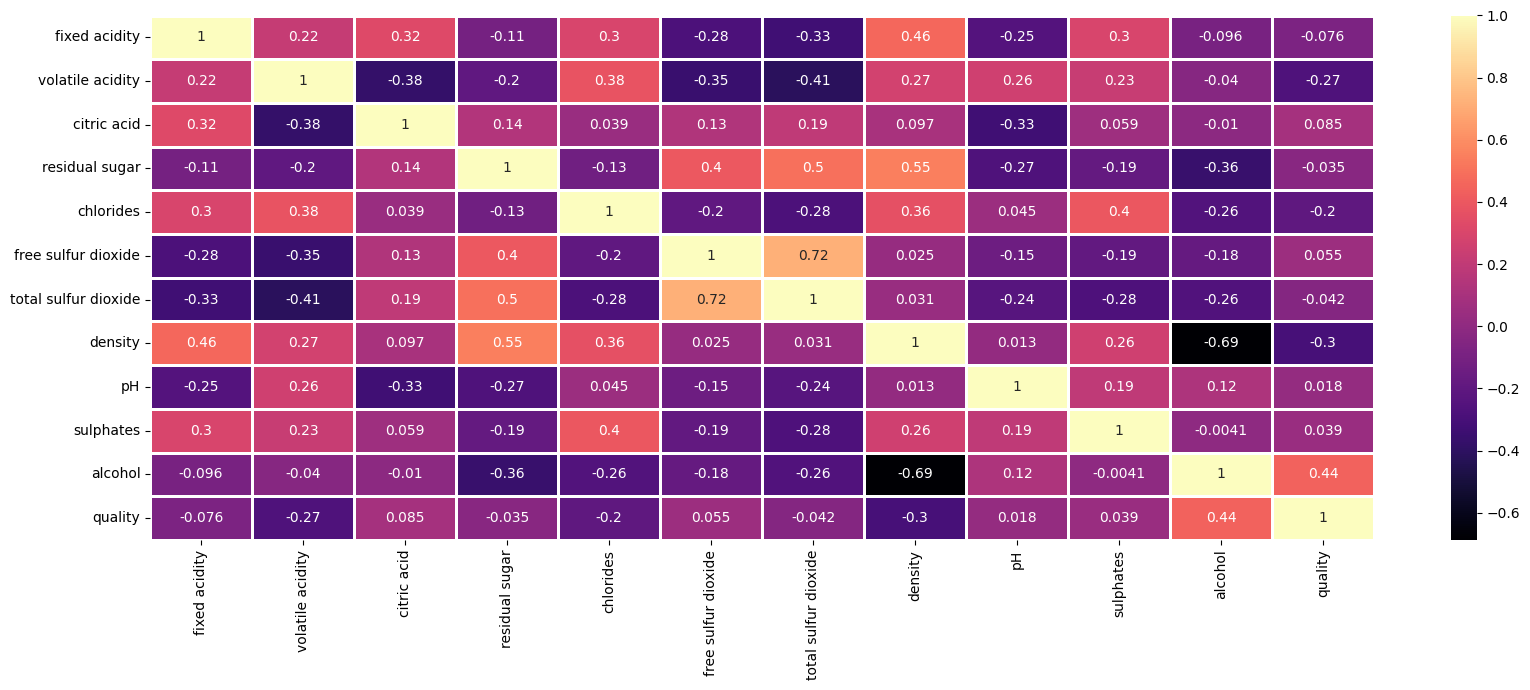

In [138]:
plt.figure(figsize=(17,7))
sns.heatmap(df.corr(numeric_only=True) , linewidths=1 , annot=True , cmap='magma')
plt.tight_layout()
plt.show()


In [139]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('type',axis=1)

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF_Value'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]
vif.sort_values(by='VIF_Value' , ascending=False)

,feature,VIF_Value
7,density,942.325957
8,pH,588.704084
10,alcohol,130.090174
11,quality,64.019566
0,fixed acidity,58.852801
9,sulphates,18.707973
6,total sulfur dioxide,14.886922
1,volatile acidity,9.519879
2,citric acid,9.354814
5,free sulfur dioxide,8.537996


In [140]:
X_x = df.drop(columns=['type' , 'density' , 'pH'] , axis = 1)

vif_df = pd.DataFrame()
vif_df['features'] = X_x.columns
vif_df['VIF_Value'] = [variance_inflation_factor(X_x.values, i) for i in range(len(X_x.columns))]
vif_df.sort_values(by='VIF_Value' , ascending=False)

,features,VIF_Value
8,alcohol,74.168501
9,quality,60.921430
0,fixed acidity,39.238116
7,sulphates,17.628731
6,total sulfur dioxide,12.283668
2,citric acid,9.139129
1,volatile acidity,8.912359
5,free sulfur dioxide,8.524010
4,chlorides,5.239971
3,residual sugar,3.311430


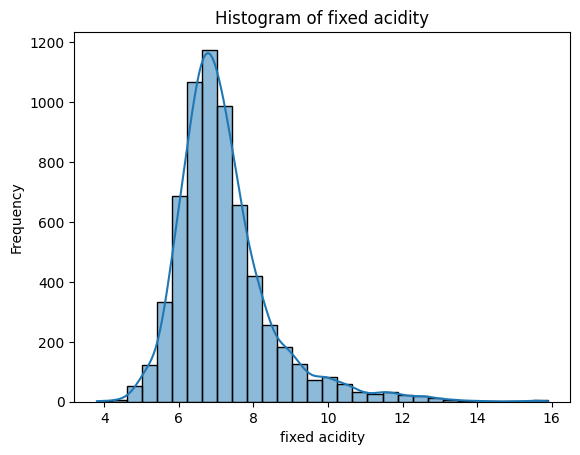

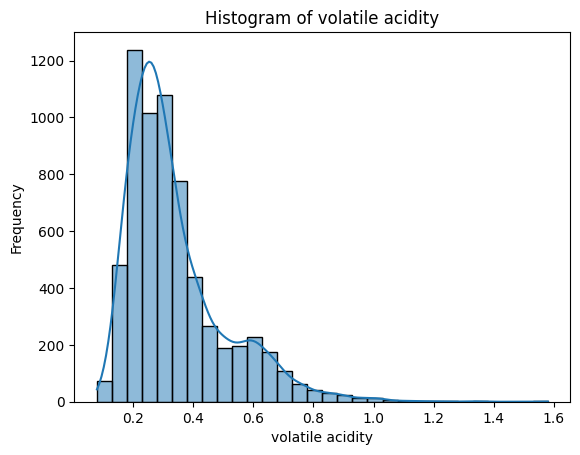

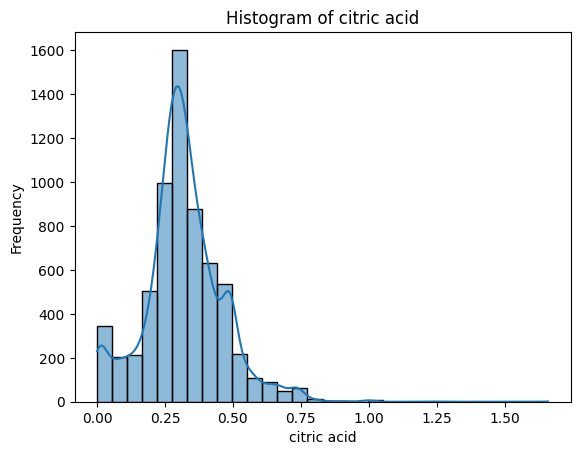

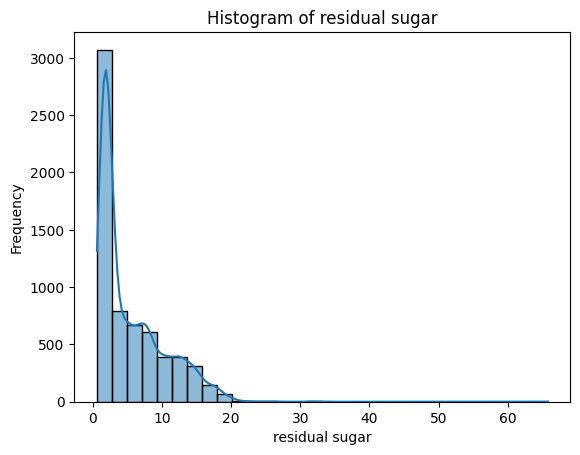

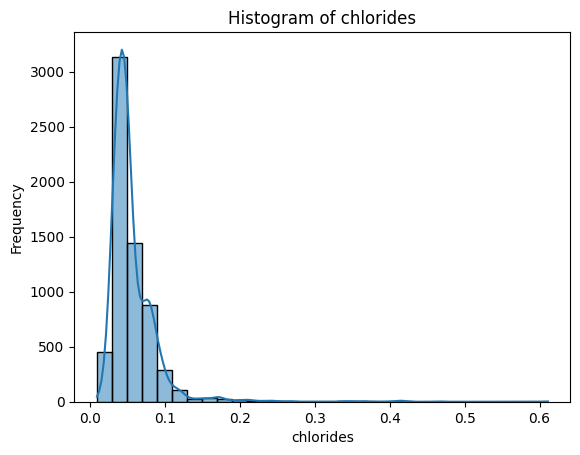

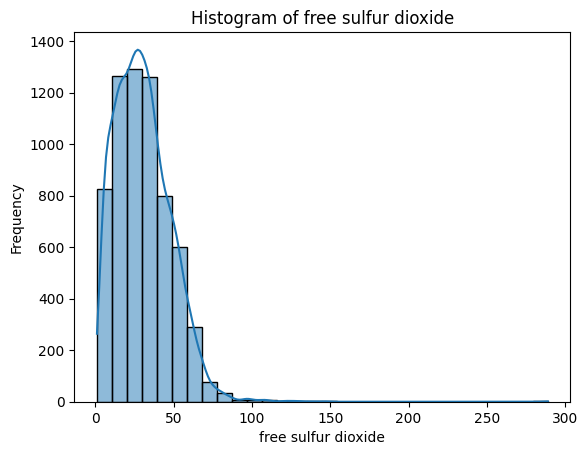

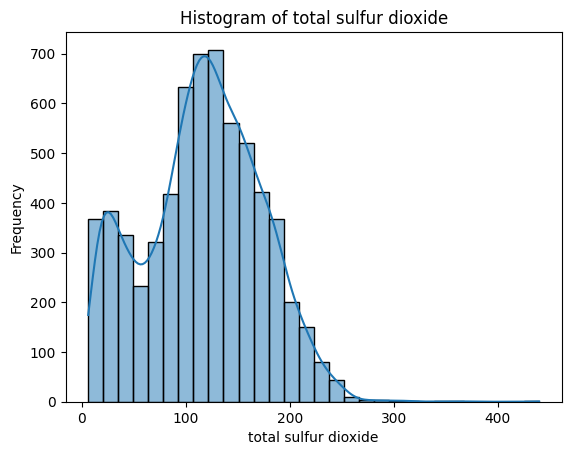

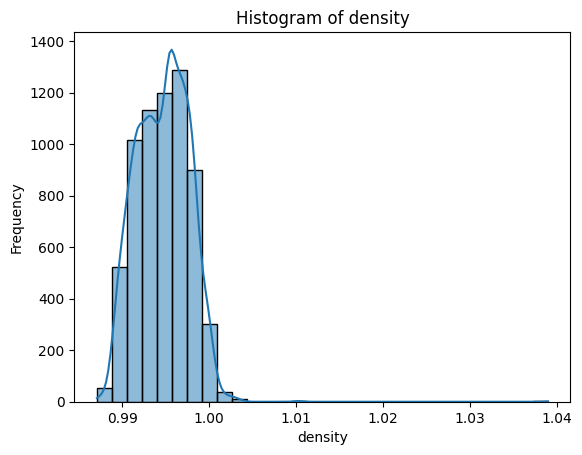

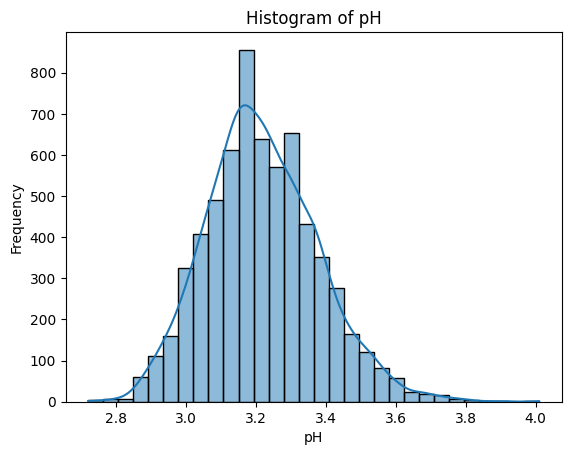

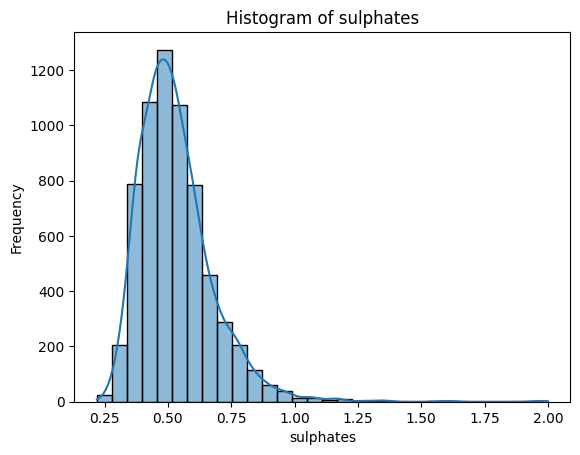

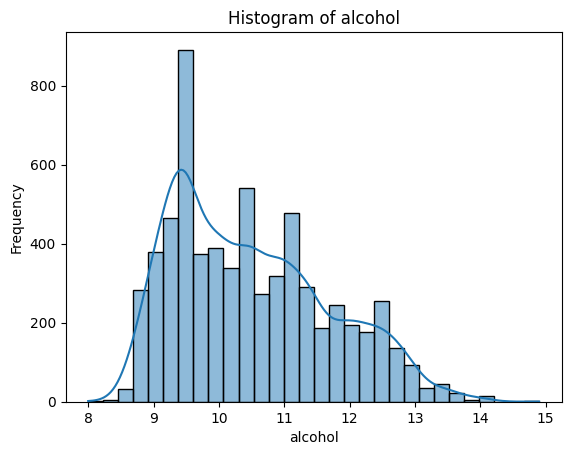

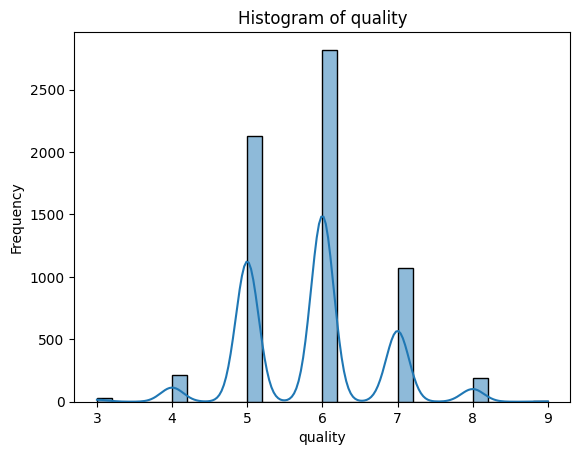

In [141]:
for col in df.select_dtypes(include='number').columns:
    sns.histplot(data=df[col] , bins= 30 , kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

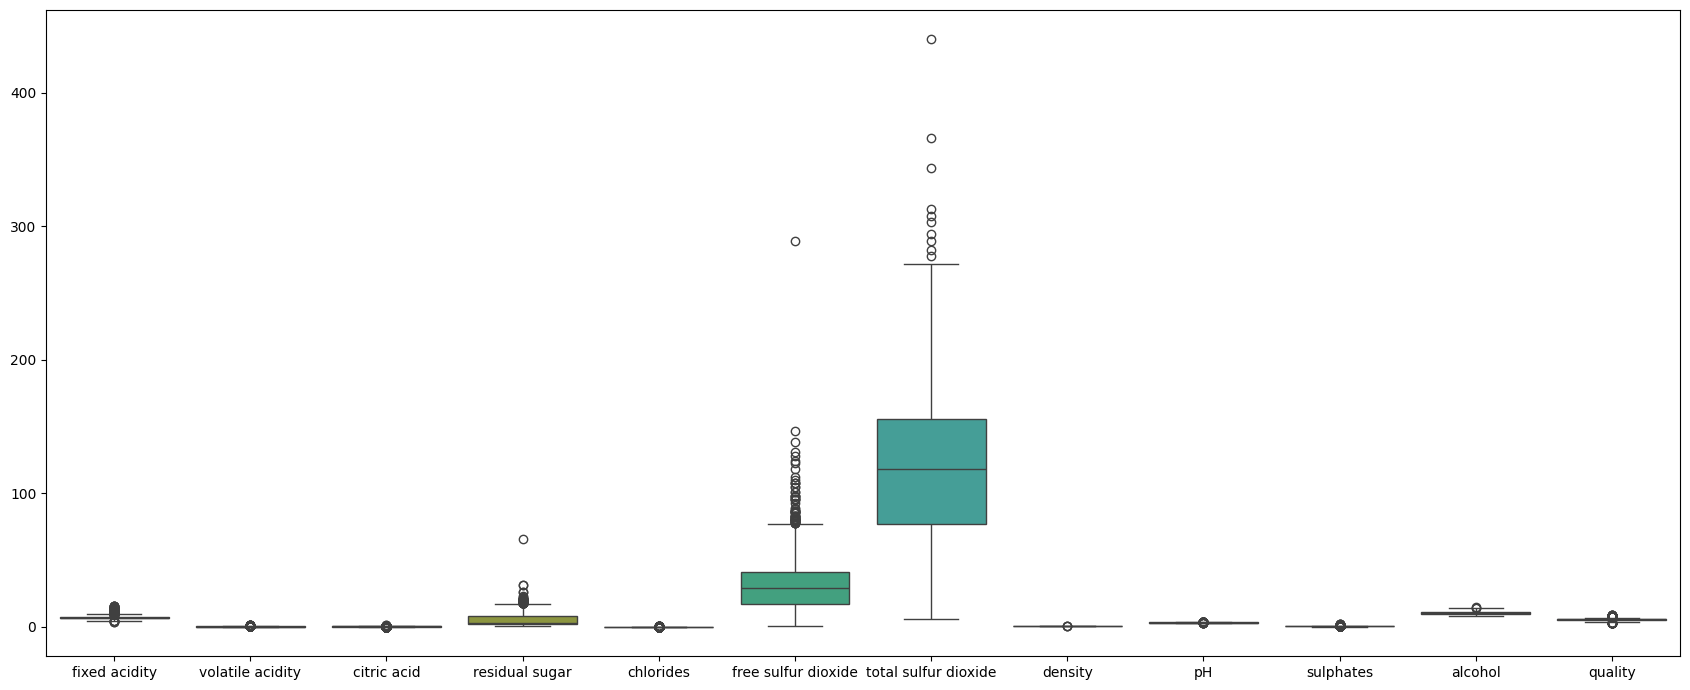

In [157]:
plt.figure(figsize=(17,7))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

In [143]:
x = df.drop('type' , axis=1)
y = df['type']

In [144]:
print(x.shape)

print(y.value_counts())

(6463, 12)
type
white    4870
red      1593
Name: count, dtype: int64


In [145]:
numerical_features = x.select_dtypes(include=['number']).columns
print(f'numerical columns :  {numerical_features.shape[0]}')
print(numerical_features)
x[numerical_features].describe()

numerical columns :  12
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [146]:
categorical_features = x.select_dtypes(include=['object' ,'category']).columns
print(f'categorical Columns : {categorical_features.shape[0]}')
print(categorical_features)


categorical Columns : 0
Index([], dtype='object')


In [147]:
num_transformer = Pipeline(
    steps=[
        ('num' , SimpleImputer(strategy='median')),
        ('scaled_val' , StandardScaler())
    ]
)

In [179]:
isf = IsolationForest(contamination=0.01 , random_state=42)
outliers_pred = isf.fit_predict(x[numerical_features])
mask_outliers = outliers_pred != -1 

x = x[mask_outliers].reset_index(drop=True)
y = y[mask_outliers].reset_index(drop=True)

In [181]:
x.shape
y.value_counts()

type
white    4840
red      1494
Name: count, dtype: int64

In [150]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric' , num_transformer , numerical_features)]
)
print(preprocessor.fit_transform(x).shape)
preprocessor.fit(x)

(6398, 12)


,transformers,"[('numeric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [151]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=42 , stratify=y)

In [152]:
log_reg_model = Pipeline(
    steps=[
        ('preprocessor' , preprocessor),
        ('Model_building' , LogisticRegression(solver='liblinear' , penalty='l1' , max_iter=1000 , random_state=42))
    ]
)

In [153]:
log_reg_model.fit(x_train , y_train)

,steps,"[('preprocessor', ...), ('Model_building', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [154]:
y_pred = log_reg_model.predict(x_test)
y_pred

array(['red', 'white', 'white', ..., 'white', 'white', 'red'],
      shape=(1280,), dtype=object)

In [155]:
y_prob = log_reg_model.predict_proba(x_test)[:,1]

In [160]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred , pos_label='red'))
print("Recall (Sensitivity):", recall_score(y_test, y_pred , pos_label='red'))
print("F1 Score:", f1_score(y_test, y_pred , pos_label='red'))


cm = confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9953125
Precision: 0.993485342019544
Recall (Sensitivity): 0.9870550161812298
F1 Score: 0.9902597402597403
[[305   4]
 [  2 969]]
Specificity: 0.9870550161812298

Classification Report:
               precision    recall  f1-score   support

         red       0.99      0.99      0.99       309
       white       1.00      1.00      1.00       971

    accuracy                           1.00      1280
   macro avg       0.99      0.99      0.99      1280
weighted avg       1.00      1.00      1.00      1280



In [161]:
display = confusion_matrix(y_test , y_pred)
display

array([[305,   4],
       [  2, 969]])

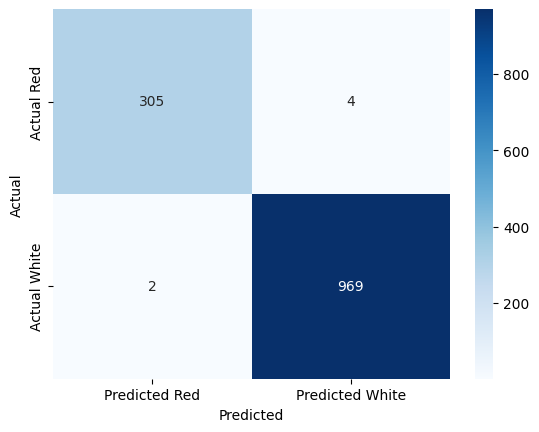

In [174]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' , xticklabels=['Predicted Red', 'Predicted White'], yticklabels=['Actual Red', 'Actual White'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [177]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(log_reg_model, x, y, cv=cv)
print(scores)
print("Mean Accuracy:", scores.mean())


[0.99296875 0.9953125  0.9953125  0.99765442 0.99296325]
Mean Accuracy: 0.994842284010946


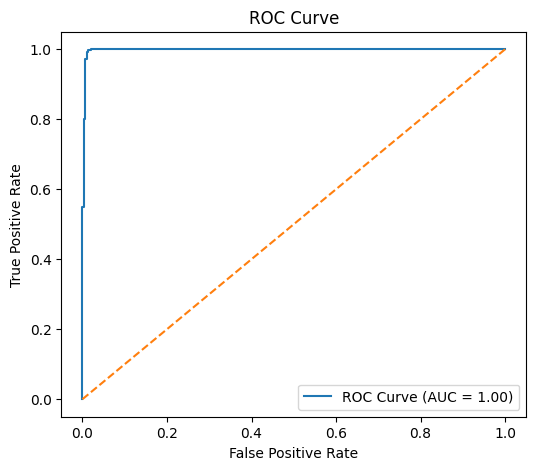

In [184]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='white')
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


c:\Users\Chinna Joka\Desktop\my virtual environment\VIR_ENV\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Chinna Joka\Desktop\my virtual environment\VIR_ENV\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Chinna Joka\Desktop\my virtual environment\VIR_ENV\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Use

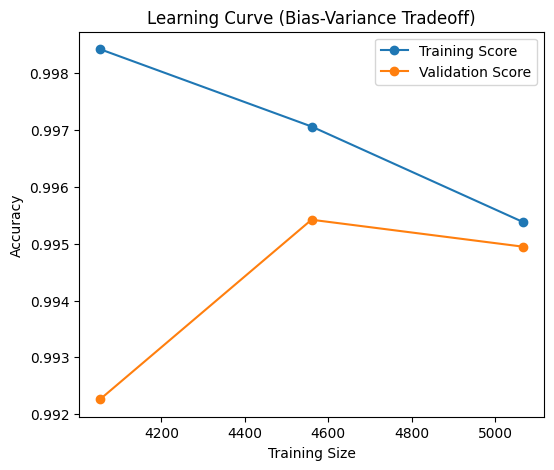

In [189]:
train_sizes, train_scores, test_scores = learning_curve(
    log_reg_model,
    x,
    y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), error_score=np.nan
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Bias-Variance Tradeoff)")
plt.legend()
plt.show()
